#06 모델 저장 및 불러오기

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드는 10개가 되어야 한다.
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
            validation_data=(x_test, y_test), 
            epochs=10, 
            )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2386 - accuracy: 0.9291 - val_loss: 0.1386 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0952 - accuracy: 0.9719 - val_loss: 0.0842 - val_accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0671 - accuracy: 0.9786 - val_loss: 0.1025 - val_accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0752 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0765 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0800 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9897 - val_loss: 0.0851 - val_accuracy:

##6-1 모델을 파일로 저장

**<save() 메소드 이용해 가중치가 업데이트된 모델 인스턴스 저장하는 방법>**  
: 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정  

**<모델이 저장되는 형식>**  


*   HDF5 포맷 (.h5 확장자) : 대용량의 데이터를 저장하기 위한 파일 형식
*   SavedModel 포맷



In [5]:
#모델을 h5포맷으로 저장
model.save('/content/drive/MyDrive/ESAA(22-1)/Week13/h5-model.h5')

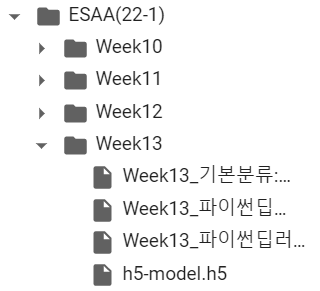

##6-2 저장된 모델 복원

In [6]:
#모델 복원
h5_model = tf.keras.models.load_model('/content/drive/MyDrive/ESAA(22-1)/Week13/h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [8]:
#모델 검증
loss, acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model] loss: {loss:.5f},acc: {acc:.5f}')

h5 model] loss: 0.10787,acc: 0.97470


앞서 훈련된 모델에서의 loss 값과 accuracy값과 비슷하게 나옴

In [9]:
#모델을 SavedModel 포맷으로 저장 : .h5 확장자 생략
model.save('/content/drive/MyDrive/ESAA(22-1)/Week13/saved-model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ESAA(22-1)/Week13/saved-model/assets


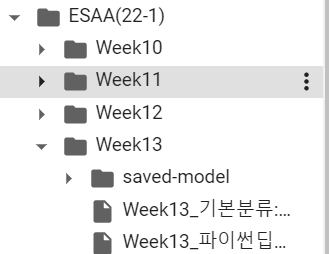

In [10]:
#모델 복원
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/ESAA(22-1)/Week13/saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
#모델 검증(HDF5 포맷)
loss,acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model] loss: {loss:.5f},acc: {acc:.5f}')

#모델 검증(SavedModel 포맷)
loss,acc = saved_model.evaluate(x_test,y_test,verbose=0)
print(f'saved_model] loss: {loss:.5f},acc: {acc:.5f}')

h5 model] loss: 0.10787,acc: 0.97470
saved_model] loss: 0.10787,acc: 0.97470


SavedModel 형식으로 저장 및 복원된 모델의 성능 = HDF5 형식으로 저장 및 복원된 모델의 성능

#07 복잡한 모델 생성

##7-1 함수형 API(Functional API)

여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의할 수 있다. 

Sequential API 로 구현한 mnist 분류기 모델을 함수형 API 로 동일하게 구현해보자

In [12]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [15]:
#모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28),name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256,activation='relu',name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64,activation='relu',name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10,activation='relu',name='OutputLayer')(x3)

레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결한다.   이렇게 여러 개의 레이어를 마치 체인구조로 입출력을 계속 연결할 수 있다.

레이어마다 name 매개변수로 이름을 부여할 수 있다. 모델 인스턴스에 대하여 summary()로 요약 출력할 때 이름이 함께 출력된다.

In [16]:
#모델 생성
func_model = tf.keras.Model(inputs=input_layer,outputs=x4,name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


복잡한 구조를 갖는 모델을 생성할 때는 summary()로는 모델의 구조도를 시각화하기 어렵다.  케라스의 유틸 패키지에서 제공하는 plot_model 모듈을 활용하여 모델의 구조도를 시각화할 수 있다.

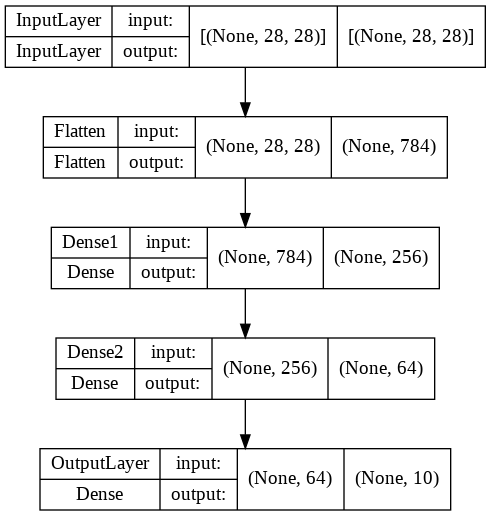

In [17]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model,show_shapes=True,show_layer_names=True,to_file='/content/drive/MyDrive/ESAA(22-1)/Week13/model.png')



*   show_shapes = True : 데이터의 입출력 shape 출력
*   show_layer_names = True : 레이어의 이름을 출력  
*   to_file : 이미지 파일로 저장 가능





In [18]:
#컴파일
func_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련
func_model.fit(x_train,y_train,epochs=3)

#검증
loss,acc = func_model.evaluate(x_test,y_test,verbose=0)
print(f'Functional Model] loss: {loss:.5f},acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3014 - accuracy: 0.1069
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.0987
Functional Model] loss: 2.30259,acc:0.09800


##7-2 모델 서브클래싱(Model Subclassing)

이 방법은 파이썬 클래스 개념을 잘 이해하고 있다면 가장 추천하는 방법이다. 하지만 파이썬 클래스의 개념이 부족하다면 굳이 Model Subclassing 으로 모델을 구현하지 않아도 좋다. 함수형 API 로 생성한 모델과의 성능 차이는 없다.

Model Subclassing 으로 모델 인스턴스를 생성하기 위해서는 tf.keras.Model를 상속받아 생성하고자 하는 모델 클래스를 구현한다. 모델의 __init__() 함수에 레이어를 정의하고 레이어의 하이퍼파라미터를 정의한다.

In [19]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256,activation='relu')
        self.dense2 = tf.keras.layers.Dense(64,activation='relu')
        self.dense3 = tf.keras.layers.Dense(10,activation='softmax')

    #method overiding
    #훈련용 함수 정의
    #x는 input
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

call() 함수를 메소드 오버라이닝으로 구현한다. call() 메소드는 fit() 메소드가 호출되어 훈련하는 경우 호출될 함수이다. 

In [20]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


tf.keras.Model을 상속받아 구현한 모델인 MyModel 을 생성자로 인스턴스를 생성한다. 모델에 이름을 부여하고 싶다면 모델 인스턴스의 _name에 이름을 지정한다. 

생성자로 객체를 생성해 저장한 mymodel 변수에 바로 summary()로 요약 출력하는 것은 불가하다. input_shape이 정의되지 않았기 때문에 전체 모델의 구조를 생성해내지 못하기 때문이다. mymodel에 Input 레이어와 함께 shape 을 정의해주면 summary() 로 모델의 요약을 확인할 수 있다. 

In [21]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2119 - accuracy: 0.9377
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0874 - accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0607 - accuracy: 0.9808
Subclassing Model] loss: 0.08250, acc: 0.97430


함수형 API로 생성한 모델과 Model Subclassing 으로 생성한 모델 모두 동일한 compile() 메소드와 fit() 메소드로 훈련할 수 있따. evaluate() 메소드로 모델 성능을 검증할 수도 있다. 단지 모델을 생성하는 방식에 차이가 있을 뿐이다.

## 7-3 서브클래싱 모델 파라미터를 활용한 생성

Model Subclassing 으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다는 점이다.

In [22]:
class MyModel(tf.keras.Model):
    
    # 생성자 parameter 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

모델의 생성자 파라미터로 기준이 되는 unit의 개수를 입력받아 Dense 레이어의 유닛 개수르 계산하여 설정한다.

In [23]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  200960    
                                                                 
 dense_8 (Dense)             multiple                  16448     
                                                                 
 dense_9 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2194 - accuracy: 0.9352
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0905 - accuracy: 0.9718
Epoch 3/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0616 - accuracy: 0.9803
Subclassing Model w. parameters] loss: 0.07723, acc: 0.97620
